In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.linalg

import sys
# sys.path.append('./Processus-Wishart-513/')

import sampling
import cir
from wishart import simulation

## CIR Process

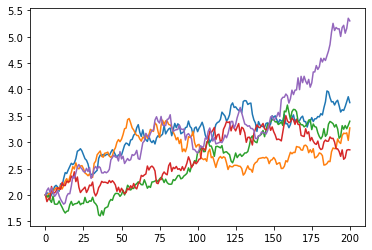

In [2]:
k = 0
a = 1.2
sigma = 0.5
n = 200
T = 2.0

cir_gen = cir.CIR(k, a, sigma, x0=2)
V = cir_gen(T=T, n=n, num=5)
plt.plot(V.T)
plt.show()

### CIR schemes

In [3]:
k = 1/2
a = 1/2
sigma = 0.8
T = 1
x0 =  3/2
num = 50000

print(f'sigma^2 <= 4a is {sigma*sigma <= 4*a}.')

cir_gen = cir.CIR(k, a, sigma, x0=x0)

sigma^2 <= 4a is True.


In [4]:
lst_n = [20, 200, 500, 1000, 1500, 2000]
# lst_n = [20, 200, 500, 1000]
# lst_n = np.arange(1, 11)

xT_exact = cir_gen(T=T, n=1, num=num)[:, -1] # The exact generated XT.
char_exact = np.mean(np.exp(-1*xT_exact))

char_2_n = np.zeros(len(lst_n))
char_3_n = np.zeros(len(lst_n))
for i in range(len(lst_n)):
    xT_2 = cir_gen(T=T, n=lst_n[i], num=num, method='2')[:, -1]
    xT_3 = cir_gen(T=T, n=lst_n[i], num=num, method='3')[:, -1]
    
    char_2 = np.mean(np.exp(-1*xT_2))
    char_3 = np.mean(np.exp(-1*xT_3))
    char_2_n[i] = char_2
    char_3_n[i] = char_3
    


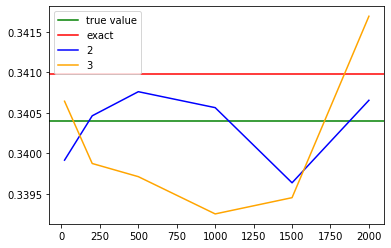

In [5]:
plt.axhline(y=0.3404, color='g', label='true value')
plt.axhline(y=char_exact, color='r', label='exact')
plt.plot(lst_n, char_2_n, color='b', label='2')
plt.plot(lst_n, char_3_n, color='orange', label='3')
plt.legend()
plt.show()

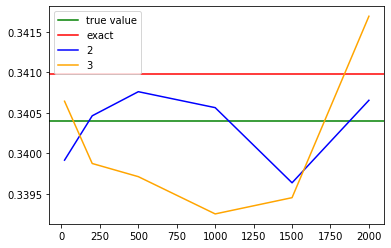

In [6]:
plt.axhline(y=0.3404, color='g', label='true value')
plt.axhline(y=char_exact, color='r', label='exact')
plt.plot(lst_n, char_2_n, color='b', label='2')
plt.plot(lst_n, char_3_n, color='orange', label='3')
plt.legend()
plt.show()

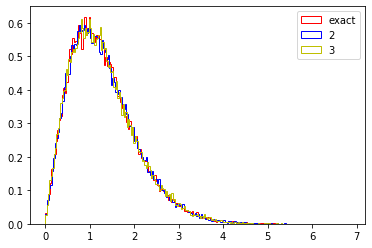

In [7]:
N = lst_n[-1]

plt.hist(xT_exact, density=True, bins=200, histtype='step', color='r', label='exact')
plt.hist(xT_2, density=True, bins=200, histtype='step', color='b', label='2')
plt.hist(xT_3, density=True, bins=200, histtype='step', color='y', label='3')
# plt.hist(xT_3*np.exp(k*T/N), density=True, bins=200, histtype='step', label='3, modified')
plt.legend()
plt.show()

## Wishart


Here we demo the simulation of $X_T$, with $a=[[2, -1], [2, 1]]$, and $b = e_2^1$.

In [9]:
x = np.array([[1,0],[0,2]])
b = np.array([[1,1],[1,1]])
a = np.array([[2,-1],[2,1]])
w = simulation.Wishart(x, 3, a, b)
t = 1

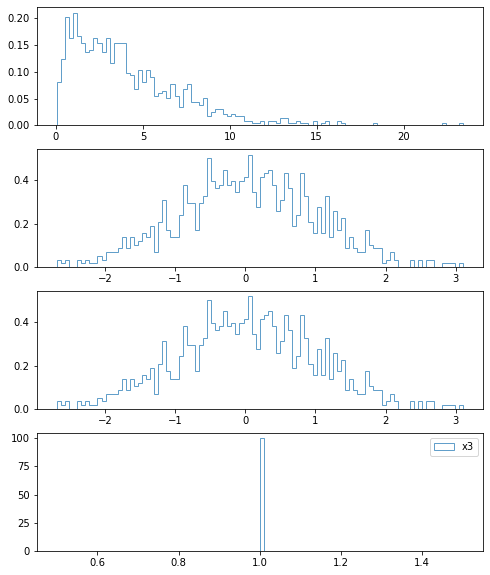

In [10]:
Xt = w.wishart_e(T=t, N=1000, num=1000)
Yt = Xt[:, -1].reshape(-1, 4)

fig, axs = plt.subplots(4, figsize=(8, 10))
for i in range(4):
    axs[i].hist(Yt[:, i], density=True, bins=100, alpha=.7, histtype='step', label=f'x{i}')

plt.legend()
plt.show()

Here we demo the simulation of $X_T$, with $a=[[2, -1], [2, 1]]$, and $b = [[1, 1], [1, 1]]$, with different iteration time $N$.

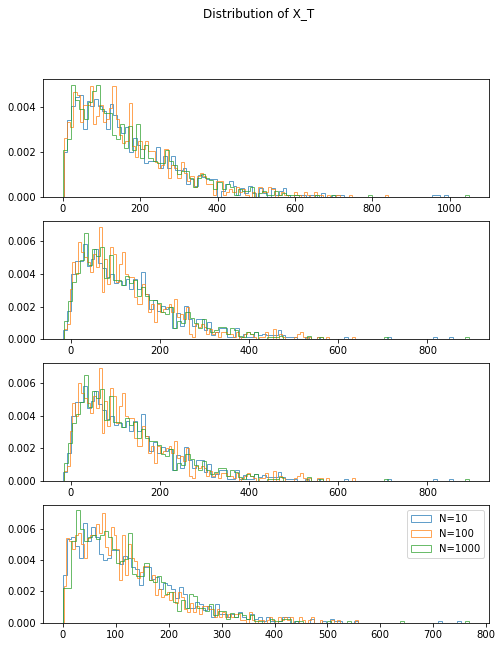

In [11]:
lst_N = [10, 100, 1000]
lst_N_Xt_3 = [w.wishart(T=t, N=N, num=1000, b=b, a=a) for N in lst_N]
lst_N_Yt = [Xt.reshape(-1, 4) for Xt in lst_N_Xt_3]

fig, axs = plt.subplots(4, figsize=(8, 10))
for i in range(4):
    for j in range(len(lst_N)):
        Yt = lst_N_Yt[j]
        axs[i].hist(Yt[:, i], density=True, bins=100, alpha=.7, histtype='step', label=f'N={lst_N[j]}')
    
plt.suptitle('Distribution of X_T')
plt.legend()
plt.show()